# Judging a Book's Genre from its Title

The purpose of this notebook is to predict a Book's Genre based on the Title alone, without prior knowledge of it's author. However, determining the genre of a book is a difficult task because book's title can be ambiguous and genre's can be overarching. 

### Dataset:

The dataset for this project has been borrowed from Cornel University and can be accessed at https://github.com/uchidalab/book-dataset. The dataset contains book cover images, title, author, class and category as its columns. There are 207,572 books categorized into a total of 32 Genre's. 

In [1]:
# Basic Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading the Dataset

In [2]:
books = pd.read_csv('book_list.csv', encoding = "ISO-8859-1", names = ['Id', 'Image', 'Image_link', 'Title', 'Author', 'Class', 'Genre'])

books.head()

,Id,Image,Image_link,Title,Author,Class,Genre
0,761183272,0761183272.jpg,http://ecx.images-amazon.com/images/I/61Y5cOdH...,Mom's Family Wall Calendar 2016,Sandra Boynton,3,Calendars
1,1623439671,1623439671.jpg,http://ecx.images-amazon.com/images/I/61t-hrSw...,Doug the Pug 2016 Wall Calendar,Doug the Pug,3,Calendars
2,B00O80WC6I,B00O80WC6I.jpg,http://ecx.images-amazon.com/images/I/41X-KQqs...,"Moleskine 2016 Weekly Notebook, 12M, Large, Bl...",Moleskine,3,Calendars
3,761182187,0761182187.jpg,http://ecx.images-amazon.com/images/I/61j-4gxJ...,365 Cats Color Page-A-Day Calendar 2016,Workman Publishing,3,Calendars
4,1578052084,1578052084.jpg,http://ecx.images-amazon.com/images/I/51Ry4Tsq...,Sierra Club Engagement Calendar 2016,Sierra Club,3,Calendars


### Data Cleaning

Let's check if there are any missing entries in the current dataset.

In [3]:
books.isna().sum()

Id                0
Image             0
Image_link        0
Title             0
Author        14413
Class             0
Genre             0
dtype: int64

The dataset contains 14413 Null values in 'Author' column. For the current project, 'Title' and 'Genre' are the only columns of interest. But for the sake of having a clean dataset, replace Null values in 'Author' column with 'Anonymous'.

In [4]:
books['Author'] = books['Author'].fillna('Anonymous')

### Data Analysis and Pre - Processing

##### Step 1: Getting the Unique Genre's

In [5]:
books['Genre'].unique()

array(['Calendars', 'Comics & Graphic Novels', 'Test Preparation',
       'Mystery, Thriller & Suspense', 'Science Fiction & Fantasy',
       'Romance', 'Humor & Entertainment', 'Literature & Fiction',
       'Gay & Lesbian', 'Engineering & Transportation',
       'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home',
       'Arts & Photography', 'Education & Teaching',
       'Parenting & Relationships', 'Self-Help', 'Computers & Technology',
       'Medical Books', 'Science & Math', 'Health, Fitness & Dieting',
       'Business & Money', 'Law', 'Biographies & Memoirs', 'History',
       'Politics & Social Sciences', 'Reference',
       'Christian Books & Bibles', 'Religion & Spirituality',
       'Sports & Outdoors', 'Teen & Young Adult', "Children's Books",
       'Travel'], dtype=object)

Let's visualize the number of books in each Genre.

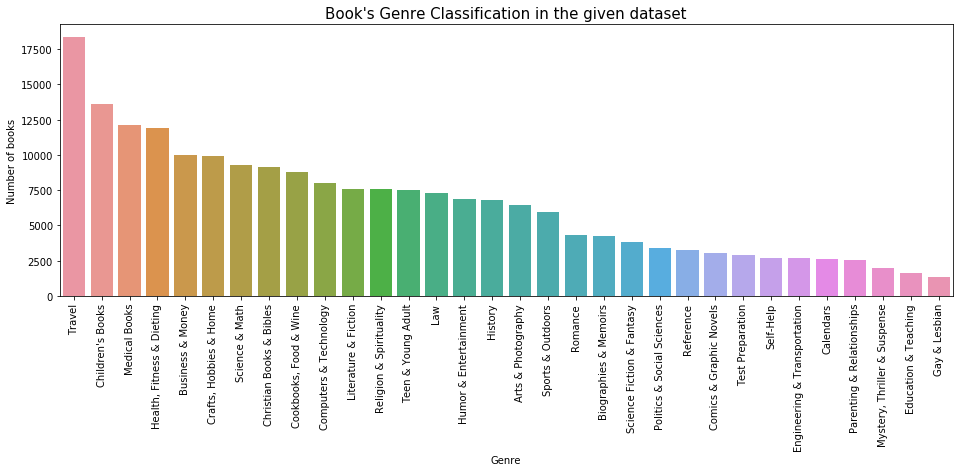

In [6]:
temp = books['Genre'].value_counts()
df1 = pd.DataFrame({'Genre': temp.index, 'Number of books': temp.values})
plt.figure(figsize = (16, 5))
plt.title("Book's Genre Classification in the given dataset",fontsize = 15)
s = sns.barplot(x = 'Genre', y = 'Number of books', data = df1)
s.set_xticklabels(s.get_xticklabels(),rotation = 90)
plt.show()

From the plot it's clear that the dataset is a bit skewed. The number of books in each category isn't distributed qually. This will impact on the prediction accuracy!

##### Step 2: Category(Genre) Encoding using Label encoder

For most machine learning algorithms to achieve the state-of-the-art results, it is necessary to convert any categorical or textual data into numerical values. Sklearn's Label Encoder is used to convert the categorical column 'Genre' into numerical values. 

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

genre_cat = le.fit_transform(books['Genre'])
print('Categorical Encoding: {}'.format(genre_cat))

genre = le.inverse_transform(genre_cat)
print('Decoding: {}'.format(genre))

print('\nEncoded and Decoded columns shape')
print(genre.shape, genre_cat.shape)

Categorical Encoding: [ 3  3  3 ... 31 31 31]
Decoding: ['Calendars' 'Calendars' 'Calendars' ... 'Travel' 'Travel' 'Travel']

Encoded and Decoded columns shape
(207572,) (207572,)


##### Step 3: Filtering useless data from Book's Title

Stopwords are the commonly used words (basic typical english words) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. Since these words take up a lot of space and processing time, it must be filtered out! This can be done using NLTK(Natural Language Toolkit). 

    >>> import nltk
    >>> nltk.download('stopwords')

For better results, let's filter the 'Title' column and remove the stopwords.

In [8]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
print('Total Number of stopwords: {} '.format(len(stop))) 

print('First few stopwords: {}'.format(stop[:5])) # typical english words to be removed from the title!

def change(t):
    # This function takes in each 'Title' and removes the stopwords from it
    return ' '.join([(i) for (i) in t if i not in stop])

books['title_alt'] = pd.DataFrame(books['Title'])
books['title_alt'].apply(change)

print('\n')
print(books['title_alt'])

Total Number of stopwords: 179 
First few stopwords: ['i', 'me', 'my', 'myself', 'we']


0                           Mom's Family Wall Calendar 2016
1                           Doug the Pug 2016 Wall Calendar
2         Moleskine 2016 Weekly Notebook, 12M, Large, Bl...
3                   365 Cats Color Page-A-Day Calendar 2016
4                      Sierra Club Engagement Calendar 2016
                                ...                        
207567    ADC the Map People Washington D.C.: Street Map...
207568    Washington, D.C., Then and Now: 69 Sites Photo...
207569    The Unofficial Guide to Washington, D.C. (Unof...
207570        Washington, D.C. For Dummies (Dummies Travel)
207571    Fodor's Where to Weekend Around Boston, 1st Ed...
Name: title_alt, Length: 207572, dtype: object


##### Step 4: Feature Extraction with TF-IDF

TF-IDF stands for Term Frequency – Inverse Document Frequency. It is one of the most important techniques used for information retrieval to represent how important a specific word or phrase is to a given document. Given an abundant textual feature (like title of a book), TF-IDF converts raw strings into vectors and each word has its own vector. Useful features from this vectors is chosen based on the numeric value assigned by Tf-IDF.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 50000, strip_accents = 'unicode', lowercase = True, analyzer = 'word', token_pattern = r'\w+', use_idf = True, smooth_idf = True, sublinear_tf = True, stop_words = 'english')

vectors = vectorizer.fit_transform(books['title_alt'])
vectors.shape 

(207572, 50000)

##### Step 5: Split the dataset into Training and Testing sets

Now that the feature and target are pre-processed and ready, split them into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, genre_cat, test_size = 0.2)

print('Training samples: {}'.format(X_train.shape, y_train.shape))
print('Testing samples: {}'.format(X_test.shape, y_test.shape))

Training samples: (166057, 50000)
Testing samples: (41515, 50000)


### Model Selection and Evaluation

Let's use the typical method for any classifying problems ~ Logistic Regression. Fit the logistic regressor using the training sets and evaluating the model's accuracy using testing set.

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'sag', max_iter = 200)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Prediction and Evaluation

hyp = lr.predict(X_test)
print('Predictions: {}'.format(hyp))

from sklearn import metrics
print ('Accuracy: {:2f}'.format(metrics.accuracy_score(y_test, hyp)))

Predictions: [31 18 13 ... 15  5 15]
Accuracy: 0.633289


The accuracy is pretty good in predicting the Genre from the book's title, considering the Book's title can be ambiguous or a single book could belong to multiple Genre's.

### Testing the Model on User Inputs

It's time to check whether the logistic classifier predicts correctly for my use-cases.

In [13]:
# My Use-cases

my_books = ['Lonely Planet Iceland', 'Tintin', 'Famous Five']
vt = (vectorizer.transform(my_books))

pred = (lr.predict(vt)) # Predict Genre's for my books!

le.inverse_transform(pred)

array(['Travel', 'Comics & Graphic Novels', "Children's Books"],
      dtype=object)

Yes! It's a perfect prediction!
##### That's All !! Happy Learning.